# The Sparks Foundation-GRIP- Data Science & Business Analytics- November-2021
# Task 2 --> Prediction Using UnSupervised ML
# Author : Muhammad Usama
# Dataset Link : https://bit.ly/3kXTdox
# Problem : From the given "Iris" Dataset, Predict the optimum number of clusters and represent it visually.

## 1. Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

## 2. Loading the iris dataset from sklearn

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
iris_df.head(10) 
#See the first 10 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [4]:
iris_df.shape

(150, 4)

In [5]:
iris_df.isnull().sum() 
#returns the number of missing value in the dataset

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [6]:
iris_df.info()
#The info() function is used to print a concise summary of a DataFrame. 
#This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
iris_df.describe() 
#as you can see after using describe() method we can see mean,std,min,max,count values of our iris dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


## 3. Using 'Elbow Method' to find optimum number of clusters for k-means classification

In [9]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
x = iris_df.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

wcss   

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.47223015873017,
 39.03998724608726,
 34.29971212121213,
 30.06311061745273,
 28.271721728563833,
 26.09432474054042]

## 4.Plotting the Result (line graph)
Plotting the results onto a line graph allowing us to observe 'The elbow'

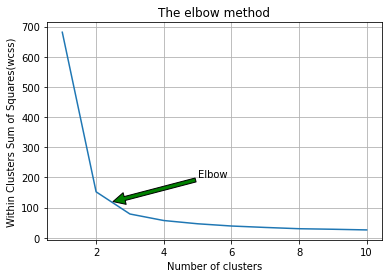

In [10]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Clusters Sum of Squares(wcss)')
plt.annotate('Elbow', xytext=(5,200), xy=(2.5,120), arrowprops={'facecolor':'green'})
plt.grid()
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as '3'.

## 5. Create and Train the Model ( KMeans)

In [11]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


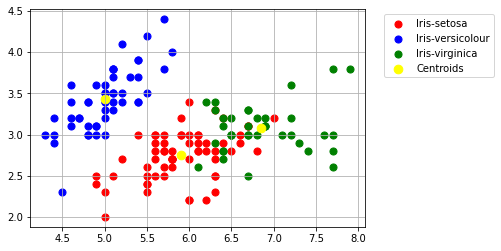

In [12]:
# Plotting the three clusters of first two columns(sepal length, sepal width) of input Iris data
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of each clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 75, c = 'yellow', label= 'Centroids')

plt.legend(loc=1, bbox_to_anchor= (1.4, 1))
plt.grid()

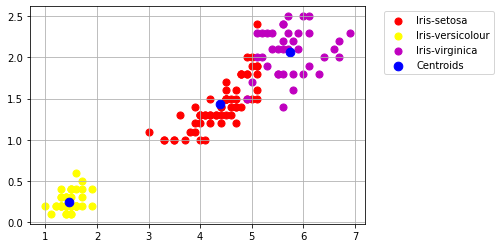

In [13]:
# Plotting the three clusters of third and fourth columns(petal length, petal width) of Iris data
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], 
            s = 50, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
            s = 50, c = 'm', label = 'Iris-virginica')

# Plotting the centroids of each clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 75, c = 'blue', label = 'Centroids')

plt.legend(loc=1, bbox_to_anchor= (1.4, 1))
plt.grid()